# ****SPAM MAIL PREDICTION MODEL****

# importing dependencies

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer#convert text into numerical values
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [59]:
d=pd.read_csv(r"C:\Users\CHANDINI\Downloads\mail_data.csv")
data=pd.DataFrame(d)
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Summarization of data

In [60]:
data.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [61]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [62]:
data.values

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?'],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['ham', 'Rofl. Its true to its name']], dtype=object)

In [63]:
data.count()

Category    5572
Message     5572
dtype: int64

In [64]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [65]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [66]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [67]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [69]:

#checking no of rows and columns in dataset
data.shape

(5572, 2)

In [70]:
data.size

11144

# Visuliazation

<AxesSubplot:ylabel='Category'>

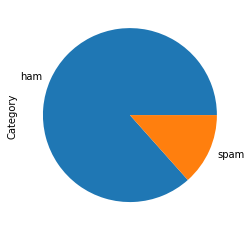

In [15]:
data.Category.value_counts().plot.pie()

415

<AxesSubplot:ylabel='Frequency'>

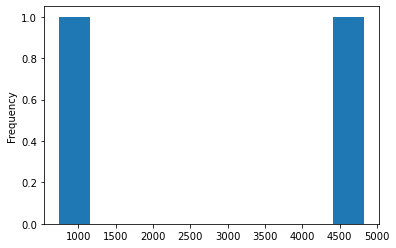

In [73]:
data.Category.value_counts().plot.hist()

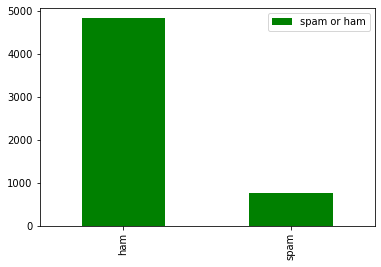

In [74]:
#plt.figure(figsize=(12,5))
data['Category'].value_counts().plot(kind='bar',color='green',label='spam or ham')
plt.legend()
plt.show()

# Data preprocessing

In [75]:
data.isnull()
#data.notnull().sum()
#data.isnull().sum()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [76]:
#replace the null values with null strings
mail_data = data.where((pd.notnull(data)),'')

In [77]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Label encoding

In [78]:
#label spam mail has 1 ;ham is 0
mail_data.loc[mail_data['Category']=='spam','Category']=1
mail_data.loc[mail_data['Category']=='ham','Category']=0


In [79]:
#seperating the data texts and label
x=mail_data['Message']

y=mail_data['Category']

In [80]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [81]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object

# split the data into training and testing

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [95]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [96]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


# Feature extraction

In [97]:
#transform the text data into features vectors(numerical values)input to support vector machine

feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

#1st parameter -if only one word repeated in dataset mail message then stop it 
#2nd para-if the words in the mail are some articles in english manner then stop that words
#3rd para-all words are converting to lowercase

In [98]:
#conevrting x_train and x_test as numerical values,becoz it is taken as strings so we need to convert into int
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)#testing data is for test data so we need not fit the data

In [99]:
#convert y_train and y_test as integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [100]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [101]:
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# Training the model

In [102]:
model=SVC()

In [103]:
#training the model with support vector machine using training data
model.fit(x_train_features,y_train)

SVC()

# evaulating the trained model


In [104]:
#prediction on training data

pred=model.predict(x_train_features)#x train have the mail msgs
accuracy=accuracy_score(y_train,pred)#here it is comparing with spam and ham with mail msgs,nothing but we are training the 
#model with our train data(it is identifying is that mail is spam or ham.so here we are checking accuracy of finding the mail)

print('accuracy on training data:',accuracy)

accuracy on training data: 0.99798070450976


In [105]:
#prediction on test data

predi=model.predict(x_test_features)
accu=accuracy_score(y_test,predi)

print('accuracy of testing data:',accu)

accuracy of testing data: 0.979372197309417


In [106]:
#here there is no overfiiting and underfitting
#becoz the test accuracy is not much less than the train accuracy. (overfiiting)




# Builiding predictive system

In [113]:
input_mail=[" "]
#convert text to feature vectors
input_data=feature_extraction.transform(input_mail)


#making prediction

prediction=model.predict(input_data)#spam-1
                                    #ham-0
print(prediction)

if (prediction[0]==1):
    print('spam mail')
else:
    print('ham mail')

[0]
ham mail
